# Wczytanie pliku .csv i wyświetlenie tablicy

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie pliku i wyświetlenie oryginalnej tablicy
direction = "./OriginalData/13_WARMINSKO-MAZURSKIE.csv"
cleaner = pd.read_csv(direction)
cleaner


,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,5,Dyson,45.0,K,2.0
1,1,9,Dyson,NaN,K,1.0
2,2,11,Beko,44.0,K,2.0
3,3,10,Electrolux,40.0,bd.,2.0
4,4,5,Electrolux,62.0,K,2.5
...,...,...,...,...,...,...
525,525,4,Dyson,36.0,bd.,3.0
526,526,6,Beko,18.0,M,3.5
527,527,8,Electrolux,43.0,K,2.0
528,528,5,Electrolux,30.0,K,3.0


# Usunięcie wierszy z niepoprawnym wiekiem

In [108]:
# Usuń wiersze z błędnym wiekiem 
cleaner = cleaner.dropna(subset=['Wiek kupującego'])

# Zapis nowego pliku z usuniętymi wierszami niepoprawnego wieku

In [122]:
# Zapisz nowy plik w folderzez AnalysisData
cleaner.to_csv(path_or_buf="./AnalysisData/13_WARMINSKO-MAZURSKIE_new.csv", index=False)

# Wyświetlenie marek zakupionych odkurzaczy

In [109]:
# Pokaż jakie marki kupiono
c_drop_dupl = cleaner.drop_duplicates(subset=['Marka'])
for brand in c_drop_dupl['Marka']:
    print(brand)

Dyson
Beko
Electrolux
Samsung
Tefal


# Policzenie średniej opinii dla każdej marki i narysowanie wykresu

Z wykresu można wnioskować produkty jakiej marki są najlepszej jakości

Text(0, 0.5, 'Średnia opinia')

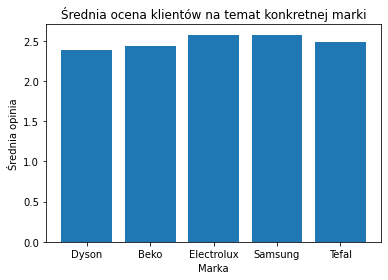

In [115]:
average_mark_list = []
averge_age_brand = []
for brand in c_drop_dupl['Marka']:
    c_brand = cleaner.loc[cleaner['Marka'] == brand]
    average_mark_list.append(sum(c_brand['Ocena'])/len(c_brand['Ocena']))
    averge_age_brand.append(sum(c_brand['Wiek kupującego'])/len(c_brand['Wiek kupującego']))
    
plt.bar(c_drop_dupl['Marka'], average_mark_list)   
plt.title("Średnia ocena klientów na temat konkretnej marki")
plt.xlabel("Marka")
plt.ylabel("Średnia opinia")

# Jak widać produkty firm Electrolux i Samsung cieszą się najlepszymi opiniami, co może świadczyć o 
# ich wysokiej jakości, najsłabiej pod tym względem wypadł Dyson.

# Wyświetlenie średniej wieku klienta każdej marki

Na tej podstawie można wnioskować jakim grupom docelowym najlepiej targetować reklamy np w serwisach społecznościowych.

Text(0, 0.5, 'Średni wiek')

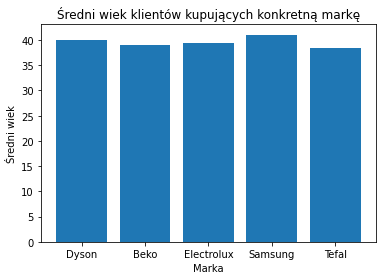

In [118]:
# Wyświetlenie średniej wieku klientów - zmienną average_age_band policzono w podpunkcie poprzednim,
# przy okazji liczenia średniej opinii
plt.bar(c_drop_dupl['Marka'], averge_age_brand)   
plt.title("Średni wiek klientów kupujących konkretną markę")
plt.xlabel("Marka")
plt.ylabel("Średni wiek")

# Statystycznie najmłodsi są klienci kupujący Tefal, natomiast najstarsi Samsung

# Średnia opinii z podziałem na płcie

Wykresy mogą mówić o tym która płeć jest bardziej surowa jeżeli chodzi o opinie w stosunku do zakupionych urządzeń

Text(0, 0.5, 'Średnia opinia')

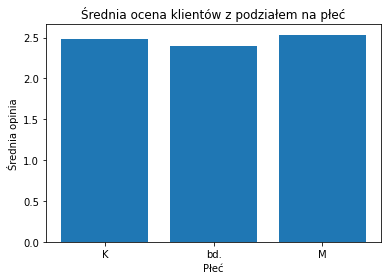

In [117]:
sex_drop_dupl = cleaner.drop_duplicates(subset=['Płeć kupującego'])
average_mark_list = []

K_customer = cleaner.loc[cleaner['Płeć kupującego'] == 'K']
M_customer = cleaner.loc[cleaner['Płeć kupującego'] == 'M']   
Bd_customer = cleaner.loc[cleaner['Płeć kupującego'] == 'bd.']   
    
average_mark_list.append(sum(K_customer['Ocena'])/len(K_customer['Ocena']))
average_mark_list.append(sum(Bd_customer['Ocena'])/len(Bd_customer['Ocena']))
average_mark_list.append(sum(M_customer['Ocena'])/len(M_customer['Ocena'])) 

plt.bar(sex_drop_dupl['Płeć kupującego'], average_mark_list)   
plt.title("Średnia ocena klientów z podziałem na płeć")
plt.xlabel("Płeć")
plt.ylabel("Średnia opinia")

# Jak widać pod tym względem obie płcie są praktycznie zgodne z minimalną większą pobłażliwością mężczyzn,
# można zatem wnioskować iż to im marketerzy mogą proponować urządzenia słabszej jakości

# Wykres opinii w zależności od czasu jaki upłynął od dnia zakupu

Wykres pozwala wnioskować czy klienci wraz z upływającym czasem są bardziej czy mniej zadowoleni z podjętej decyzji

Text(0, 0.5, 'Średnia opinia')

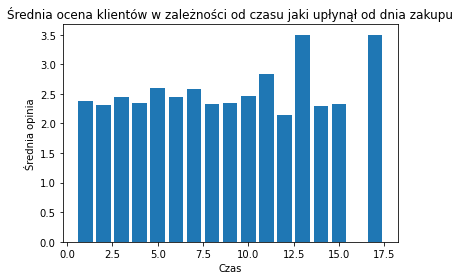

In [119]:
day_drop_dupl = cleaner.drop_duplicates(subset=['Dni od zakupu'])
min_day = min(cleaner['Dni od zakupu'])
max_day = max(cleaner['Dni od zakupu'])
average_mark_day = []

for day in day_drop_dupl['Dni od zakupu']:
    a = cleaner.loc[cleaner['Dni od zakupu'] == day]
    average_mark_day.append(sum(a['Ocena'])/len(a['Ocena']))


plt.bar(day_drop_dupl['Dni od zakupu'], average_mark_day)   
plt.title("Średnia ocena klientów w zależności od czasu jaki upłynął od dnia zakupu")
plt.xlabel("Dni od daty zakupu")
plt.ylabel("Średnia opinia")

# Wydaje się iż wraz z upływem czasu kupujący są coraz bardziej zadwoleni z zakupu.

# Wykres średniej opinii na teamt zakupionych urządzeń w zależności od wieku klienta

Wykresy pozwolą wnioskować czy wraz z wiekiem zmienia się pobłażliwość klientów w stosunku do zakupionych spęrztó

Text(0, 0.5, 'Średnia opinia')

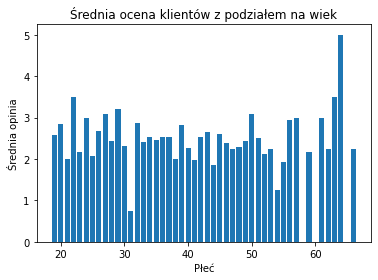

In [114]:
age_drop_dupl = cleaner.drop_duplicates(subset=['Wiek kupującego'])
min_age = min(age_drop_dupl['Wiek kupującego'])
max_age = max(age_drop_dupl['Wiek kupującego'])
min_age
average_mark_age = []
age_list = []

for age in age_drop_dupl['Wiek kupującego']:
    if(age > min_age and age < max_age):
        age_list.append(age)
        a = cleaner.loc[cleaner['Wiek kupującego'] == age]
        average_mark_age.append(sum(a['Ocena'])/len(a['Ocena']))    

plt.bar(age_list, average_mark_age)   
plt.title("Średnia ocena klientów z podziałem na wiek")
plt.xlabel("Wiek")
plt.ylabel("Średnia opinia")

# Trudno doszukać się jednoznacznego trendu, ze względu na możliwą małą liczbę osób w starszym wieku, 
# jednak istotnie możliwe iż to starsze osoby są najbardziej zadowolone ze swoich urządzeń